In [1]:
 !git branch

  main
* new_orchestrator


In [2]:
!pip3 install /Engineering/Milestone3/VirtualMachine/Orchestrator/sail/

Processing /Engineering/Milestone3/VirtualMachine/Orchestrator/sail
  Created wheel for sail: filename=sail-0.1-py3-none-any.whl size=2569113 sha256=1acb15a07267b0a8c5d2961854dd2fdbe3c722ae0d6c3c411f1d5e4fe74cfe7e
  Stored in directory: /tmp/pip-ephem-wheel-cache-skjapu45/wheels/b0/60/b6/609c9a342cddf0049ae606db2c0c6669680b2612a0e7553b31
Successfully built sail
  Attempting uninstall: sail
    Found existing installation: sail 0.1
    Uninstalling sail-0.1:
      Successfully uninstalled sail-0.1


In [3]:
from sail.core import VMSetup, registersafeobj,login,connect,pushsafeobj,querydata,get_fns
from sail.data import RemoteDataFrame, Utils
from sail.algo import fdxgb
import time
start_time = time.time()

In [4]:
import json, requests
soPath = "/Engineering/Milestone3/EndPointTools/SafeObjectEditor/KPMG/safeobjects"
contractdict = [{"DigitalContractGuid":"{3ED8F4ED-A6BD-49DC-89C0-1A124D655F21}"}, {"DigitalContractGuid":"{358729A6-126B-4651-82E2-BE3F1CAA2709}"}]
backendIP = "52.150.26.47"

registersafeobj(soPath)
print("[P]safe objects registered")

[P]safe objects registered


In [5]:
eosb = login("r@r.r", "SailPassword@123", 6200, backendIP)
print("[P]login success")
print(eosb)

[P]login success
5iEQAhtloSNMFSjeoGD6QO36rtdk28PlCsTd2G85rnceCIRMY8++jD8sTnqS47/WDlcUjw0DAADadiejMSK84Nc9JWtH9UhJ45oLjMgQPlm9hrZkpfQSrjhHZWXjL/RrW4vPZAdnrBRo5mnFuyErCQGw73eBxDYHidc6G5c3jKJVC19PLUBwKx4bBB86jpL4PS7+9DaS/58rtknMXgMTmt/RV3z4lwJT5KB2/n+XItA6S4SMWrfdxXhOMjWkOyK1OE4vCsH+6PMEFCbWOB7aqcxB6EtyrVm+t0H1j0LDbHzRFFOAzWIES8dem59Sev90+PPetl4xoL2Vre5dtrAiIKipG6SDwMHm6hAvgWYZcwtqyD0Q15v9B9PV1BA/sHsJmaSaij0WX2i1Cv94xYPKJZkpsuFRzLXlsYzLF+/IMjGnpCb+aFzJ1uDcXThT9+DSo7aRcpstQrQX57egQE1lEO3cgbmzX3zhs2Xl3EhP66KlKWkX+BrBcWFIz4uOb+Hn3DR1a8biFgnlIFlFwwrgefGvua5LuBY9P1bM4CPi2/WOD6VcfvjRa6hYbE6r2PfdFWu4GFtFtU/9azs5C7nv68bxDMXwLjilwaE94RBIA/mrnZukb/1GhtxRPYxWA9QtHYtJUiFdLg1C04hlacRzhiofWGmHajcmCX/EWMu0bxg7sLw3GTeOByWkAhWwuGfAg4jNgGj1Y/JPBhTciCoZhs8xQL2yrOYjChzyDfDtjarpzlPjayaqxXCuibACfuXsl9EorvQVnaw74NYwyMMAlGKwahsnYSpPH2GeOZhI8g6D/3x9N7o6tNCuUoF/C44fbWZm6OF3MjfZIFDE8wBlAmiplFVK3l5pPm0lWt7ypkN5cwqlHYRZF+hyKpMUrLAKNF2i9ihGurz0cn+tQT3BKRn+928dYSQ67jKRwmLm06+kvWwNcHJzZeZUqIB0RK9q5iQUQOlsFqVBl2dX9S/MAVx

In [6]:
url = "https://"+backendIP+":6200/SAIL/VirtualMachineManager/GetRunningVMsIpAdresses?Eosb="+eosb

payloads = []
for item in contractdict:
    temp = json.dumps(item)
    payloads.append(temp)

headers = {
    'Content-Type': 'application/json'
}

ips = []
for payload in payloads:
    print(payload)
    response = requests.request("GET", url, headers=headers, data=payload, verify=False)
    response = response.json()
    print(response)
    for key in response['VirtualMachines']:
        ips.append(response['VirtualMachines'][key])
        print(ips)

{"DigitalContractGuid": "{3ED8F4ED-A6BD-49DC-89C0-1A124D655F21}"}


/usr/local/lib/python3.8/dist-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host '52.150.26.47'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


{'Status': 200.0, 'VirtualMachines': {'3C8C9C41B5CD467991FF6A3CF305F223': '20.115.33.107'}}
['20.115.33.107']
{"DigitalContractGuid": "{358729A6-126B-4651-82E2-BE3F1CAA2709}"}
{'Status': 200.0, 'VirtualMachines': {'8856DBF76EA64482893B1CEE7B12283F': '20.115.33.213'}}
['20.115.33.107', '20.115.33.213']


/usr/local/lib/python3.8/dist-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host '52.150.26.47'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


In [7]:
vmids = []
for ip in ips:
    vmid = connect(ip, 3500)
    vmids.append(vmid)
print("[P]virtual machine connection to ip: {0} success".format(ip), flush=True)
    
fns = get_fns()
for vm in vmids:
    for key in fns:
        pushsafeobj(vm, fns[key])
print("[P]safe object pushed to virtual machines" , flush=True)

table = []
for vm in vmids:
    tableid = querydata(vm)
    table.append(tableid)
print("[P]obtain table ids", flush=True)

[P]virtual machine connection to ip: 20.115.33.213 success
[P]safe object pushed to virtual machines
[P]obtain table ids


In [8]:
fns

{'getitem': 'F11C49327A9244A5AEE568B531C6A957',
 'getattr': '9C4019584DB04B1A9BF05EC91836BCB0',
 'setitem': 'A04E4CC9E3BC4A7B9AFAB6CB3E040FAC',
 'iter': 'CC8B5A66C10F47A1A977E2BE2B522768',
 'next': '6D48AC3C3245411992E65E5FF5B90DDB',
 'rdf_describe': '18F2566E7FF34D77A7DE668DD220CEFD',
 'rdf_drop': '9A04D50B403C4716A79CABEF1F90D832',
 'rdf_dropna': '039181877F8A492A86A4BD996D0AD4E2',
 'rdf_merge': '8C938D7D313A49C09509D6A43AAFD096',
 'rdf_groupby': '3E3716FCA7DE4ABEB8A3FAB4DA14EA9D',
 'rdf_query': 'BF18C294BCCC4B9C94624C79D2506CCC',
 'rdf_sort_values': '10DCB6636C8A4832AD6CE7BCDB1F9983',
 'rdf_set_index': '09EE6479EE97461DBC4E44D95D77235B',
 'rdf_reset_index': 'F408E02C932D47C49BC5DC640C108AEB',
 'rdf_label_encode': '56D864CD0B81459CB0540E364BB49D6F',
 'groupby_agg': 'CEFAABE1879741269037050B25A5CCFD',
 'groupby_diff': '9604982079924320B6C7B6DCA27CFC6C',
 'groupby_cumsum': 'AB04C77FA5DD4B1B8AAD2867F44BC886',
 'groupby_first': 'FF2156013B9A483F9FC8F0DB27E3B74D',
 'series_add': 'B13E83BD

In [9]:
table

[{'Telco Split 1': '5944BC32A62E1140A18D45C83ADE6743'},
 {'Telco Split 2': '536DE55B26CDF64ABBB96D4792486A65'}]

In [10]:
mid_time = time.time()


u1 = Utils(vmids[0], fns)
u2 = Utils(vmids[1], fns)
df1 = u1.read_csv(table[0]['Telco Split 1'])
df2 = u2.read_csv(table[1]['Telco Split 2'])
dfs = [df1, df2]

print(time.time() - mid_time)

10.011924982070923


In [11]:
dfs

['{0718A245-F56F-48F0-9269-A166C7BF4632}.5C37473C6D3443F49C03CAF0D746B997',
 '{F2B1E86B-AF3A-47A6-8BF3-F9136E4E6AD8}.5C37473C6D3443F49C03CAF0D746B997']

In [12]:
n=2
data1 = RemoteDataFrame(vmids[0], df1, fns)
data2 = RemoteDataFrame(vmids[1], df2, fns)
data = [data1, data2]

In [13]:
data

In [14]:
dtypes = data1.dtypes
type_dict = dict(dtypes)
cate_labels = [key for key in type_dict if type_dict[key] in ['bool', 'object']]
cate_labels.remove('phone number')

In [15]:
cols = []
cols.append(data1.columns)
cols.append(data2.columns)

In [16]:
data1.index

RangeIndex(start=0, stop=1665, step=1)

In [17]:
y=[]
X=[]
n=2
for i in range(n):
    if 'phone number' in cols[i]:
        data[i].data_id = data[i].drop('phone number', axis = 1)
    data[i].data_id = data[i].label_encode(cate_labels)
    y.append(data[i]['churn'])
    X.append(data[i].drop('churn', axis = 1))

In [18]:
cols[0]

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [19]:
dim = len(cols[0])-2
fdxgbmod = fdxgb(vmids, params={'max_depth': 8 }, feature_num = dim)

In [20]:
y_new = []
for item in y:
    y_new.append(item.data_id)
y=y_new
y

['{B25966B0-DEC4-45BD-BB99-A1B320C5787A}.048E16B349F8450694B1B30E0E49E6CE',
 '{7F210E91-A1B8-4193-924B-231D16FDE71D}.048E16B349F8450694B1B30E0E49E6CE']

In [21]:
mid_time = time.time()

model = fdxgbmod.fit(X,y)

print(time.time() - mid_time)

all_hashes has len 71
all_hashes has len 71
Tree 1
Tree 2
Tree 3
Tree 4
Tree 5
Tree 6
Tree 7
Tree 8
Tree 9
Tree 10
Tree 11
Tree 12
Tree 13
Tree 14
Tree 15
Tree 16
Tree 17
Tree 18
Tree 19
Tree 20
125.26199865341187


In [22]:
mid_time = time.time()
results =  fdxgbmod.aucpr_score(model, X, y)
print(time.time() - mid_time)

2.01798415184021


In [23]:
results

[[array([0.20953327, 0.20874751, 0.20916335, ..., 1.        , 1.        ,
         1.        ]),
  array([1.        , 0.99526066, 0.99526066, ..., 0.00947867, 0.00473934,
         0.        ]),
  array([0.023     , 0.02304066, 0.02310413, ..., 0.9909376 , 0.99360305,
         0.9967289 ], dtype=float32),
  [array([[   0, 1454],
          [   0,  211]]),
   array([[ 122, 1332],
          [   0,  211]]),
   array([[544, 910],
          [  0, 211]]),
   array([[857, 597],
          [  2, 209]]),
   array([[1026,  428],
          [   4,  207]]),
   array([[1143,  311],
          [   9,  202]]),
   array([[1214,  240],
          [   9,  202]]),
   array([[1259,  195],
          [   9,  202]]),
   array([[1289,  165],
          [  11,  200]]),
   array([[1309,  145],
          [  16,  195]]),
   array([[1336,  118],
          [  16,  195]]),
   array([[1347,  107],
          [  17,  194]]),
   array([[1361,   93],
          [  20,  191]]),
   array([[1365,   89],
          [  21,  190]]),
  

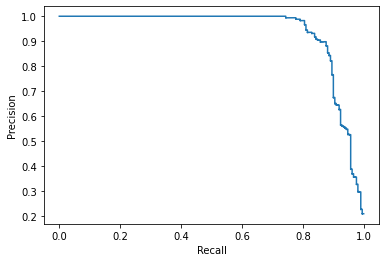

In [24]:
precision = results[0][0]
recall = results[0][1]
import numpy as np
#precision = np.append(precision, [1])
#print(precision)
#print(recall)
from sklearn.metrics import PrecisionRecallDisplay
import matplotlib.pyplot as plt
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()

In [25]:
pred = fdxgbmod.predict(X)

In [26]:
len(pred[1])

1666

24.053126096725464


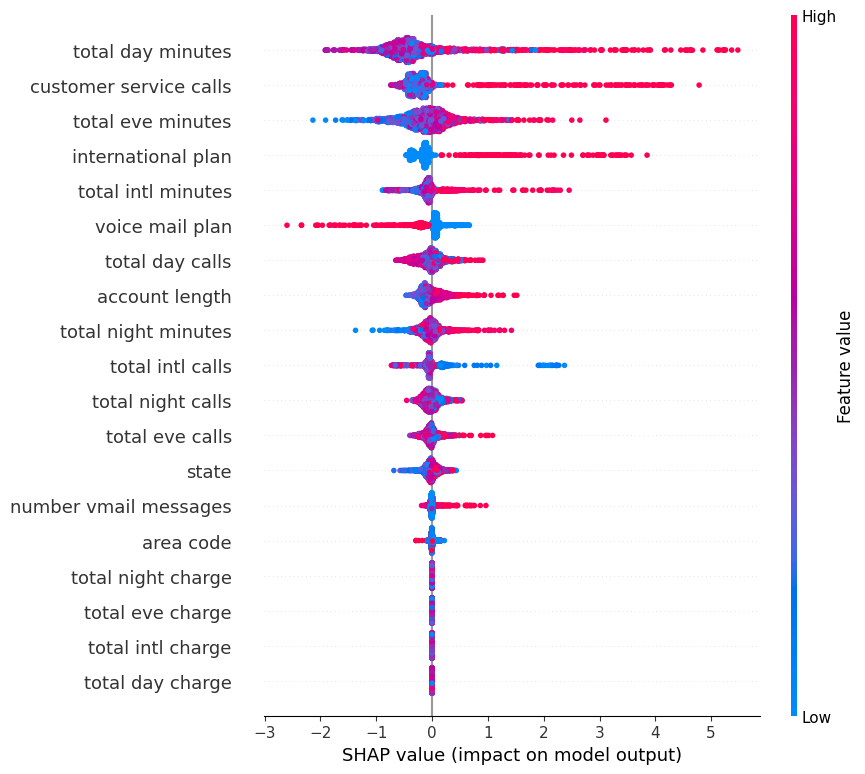

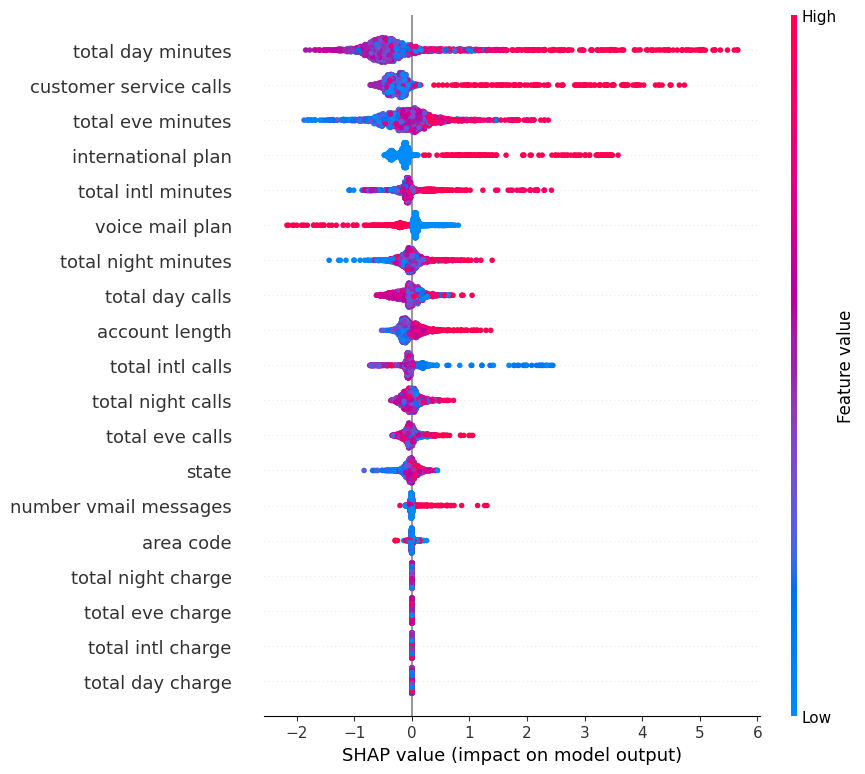

In [27]:
mid_time = time.time()

fdxgbmod.model = model
fdxgbmod.shap(X)

print(time.time() - mid_time)

In [28]:
from sail.core import newguid, pushdata, submitjob, pulldata, queryresult, setparameter

def shap_private(vmid, model, X_data_id, fns):
    jobid = newguid()
    # push string remotely
    inputs = pushdata(vmid, [model])
    print(inputs)
    # add test data to inputs
    inputs.append(X_data_id)

    setparameter(vmid, jobid, fns["shap_private"], inputs)
    submitjob(vmid, fns["shap_private"], jobid)
    pulldata(vmid, jobid, fns["shap_private"])
    results = queryresult(jobid, fns["shap_private"])

    return results[0], results[1], results[2]

In [29]:
X[0]

'{02F50634-6391-40EF-8F3E-72F5AC5BD41F}.2AE27D27AE4C4B6BAD3136BAC75B1667'

In [30]:
newguid()

'{9453F887-9F25-478C-8599-D1232B3DFEB4}'

In [31]:
vmids[0]

'{F8F42621-5E14-4EDC-90A2-AE397E83B9F3}'

In [32]:
fdxgbmod.model

In [33]:
explanation_values, explanation_base_values, expected_value, = shap_private(vmids[0], model, X[0], fns)

['{4F4A370D-AC0C-4FA9-950C-5A885089C222}']


In [34]:
explanation_values

array([[-1.26767695e-01,  1.55292898e-01, -2.45463308e-02, ...,
        -7.86147937e-02,  0.00000000e+00, -1.76807091e-01],
       [-5.88429580e-03, -9.54694003e-02,  7.55558955e-03, ...,
        -4.91357557e-02,  0.00000000e+00, -3.14335167e-01],
       [-4.01380174e-02,  1.30612761e-01,  1.56249851e-03, ...,
        -9.37401131e-02,  0.00000000e+00, -2.58657664e-01],
       ...,
       [-1.98232397e-01,  1.64469838e-01,  1.99467484e-02, ...,
        -8.01899191e-03,  0.00000000e+00,  1.87903059e+00],
       [-1.11399675e-02,  6.68981314e-01,  2.06200518e-02, ...,
        -4.28315625e-02,  0.00000000e+00, -2.66787469e-01],
       [-8.83762259e-03, -9.67255160e-02, -3.46968276e-03, ...,
         1.88778818e-01,  0.00000000e+00, -1.60229653e-01]], dtype=float32)

In [35]:
explanation_base_values

array([-2.400059, -2.400059, -2.400059, ..., -2.400059, -2.400059,
       -2.400059], dtype=float32)

In [36]:
expected_value

-2.400059

In [37]:
import shap

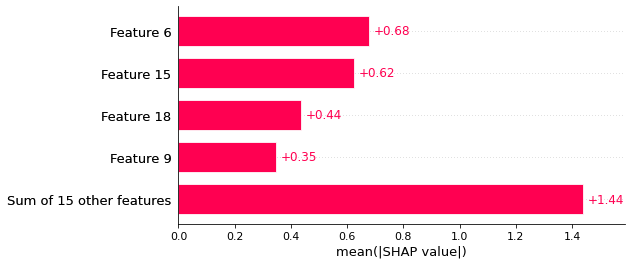

None


elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


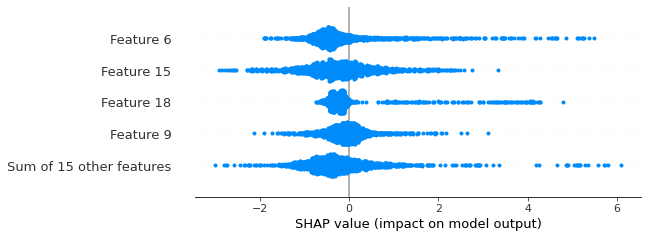

None


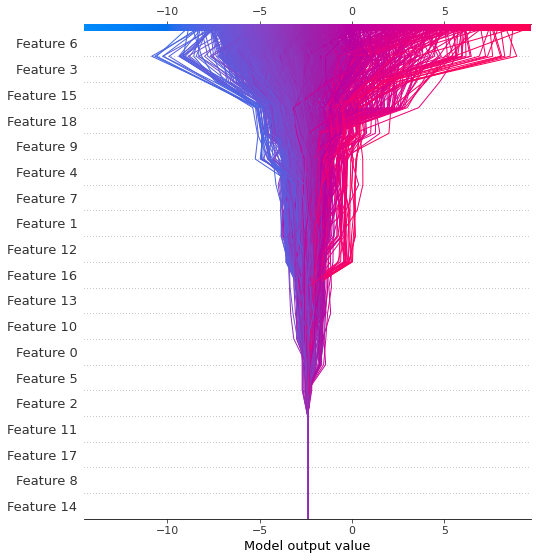

None


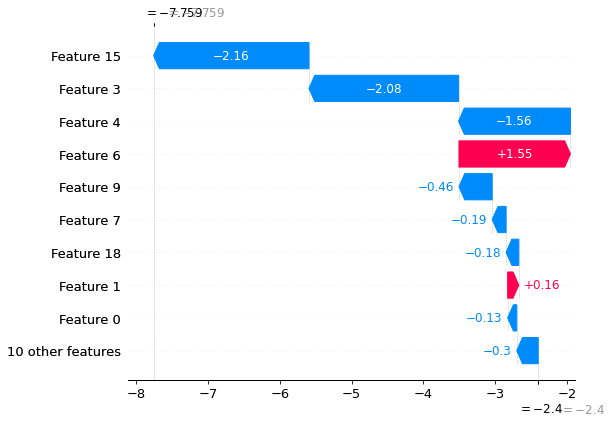

None


In [39]:
explanation = shap.Explanation(explanation_values, base_values=explanation_base_values)
print(shap.plots.bar(explanation, max_display=5))
print(shap.plots.beeswarm(explanation, max_display=5))
print(shap.decision_plot(expected_value, explanation.values))
print(shap.plots._waterfall.waterfall_legacy(expected_value, explanation[0].values))